I will be conducting Exploratory Data Analysis on the Titanic Dataset. <br>
Dataset Link : https://www.kaggle.com/datasets/yasserh/titanic-dataset <br> <br>
Let's import the required packages and mount the drive first.


In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Different methodsd can be used to retrieve the dataset but I will be using drive mounting
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now let's list the files inside the drive to check if the dataset is in there.

In [2]:
!ls "/content/drive/My Drive/Colab_Materials/Titanic_Dataset_Deep_Dive"

Titanic-Dataset.csv


Assuming the file is there, let's now load it as a dataframe and save it to a DataFrame named ***df***.

In [3]:
# Change the directory to wherever you install the titanic dataset
df = pd.read_csv("/content/drive/My Drive/Colab_Materials/Titanic_Dataset_Deep_Dive/Titanic-Dataset.csv", sep = ",")

Let's visualise it to see a portion of the data and get the first impression.

In [4]:
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


![Initial Dataframe](https://i.imgur.com/6Hb7e4J.png)
<br>
It should look something like this. For some reason, some fields are ***NaN***
<br> <br>
Now let's gather some information about the columns from the website.
<br> <br>
**PassangerId** : Passanger ID (unique) <br>
**Survived** : Whether survived or not (0 or 1) <br>
**Pclass** : Ticked class (1 = 1st, 2 = 2nd, 3 = 3rd) <br>
**Name** : Name of the passanger <br>
**Sex** : Sex of the passanger <br>
**Age** : Age in years <br>
**SibSp** : No. of siblings / spouses aboard the Titanic <br>
**Parch** : No. of parents / children aboard the Titanic <br>
**Ticket** : Ticket number <br>
**Fare** : Passanger fare <br>
**Cabin** : Cabin number <br>
**Embarked** : Port of Embarktion (C = Cherbourg, Q = Queenstown, S = Southampton)
<br> <br>
***NaN*** cells only appear to be in the fields ***Age*** and ***Cabin*** but it is better to make sure than assume so let's just count the cells with unassigned (***NaN***) values and print them.

In [5]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


![NaN Counts](https://i.imgur.com/dWnX3cr.png)

Of course! We couldn't see the ***NaN*** cells in the Embarked field as the dataframe was too large for us to see all of it but turns out there are 2 unassigned cells there as well. It is also interesting to see that the ***Cabin*** field is unassigned for a TON of rows (approximately 77% of the rows).
<br><br>
How about visualising the distribution of the values in these columns? Let's plot them roughly to get an idea about the distributions.


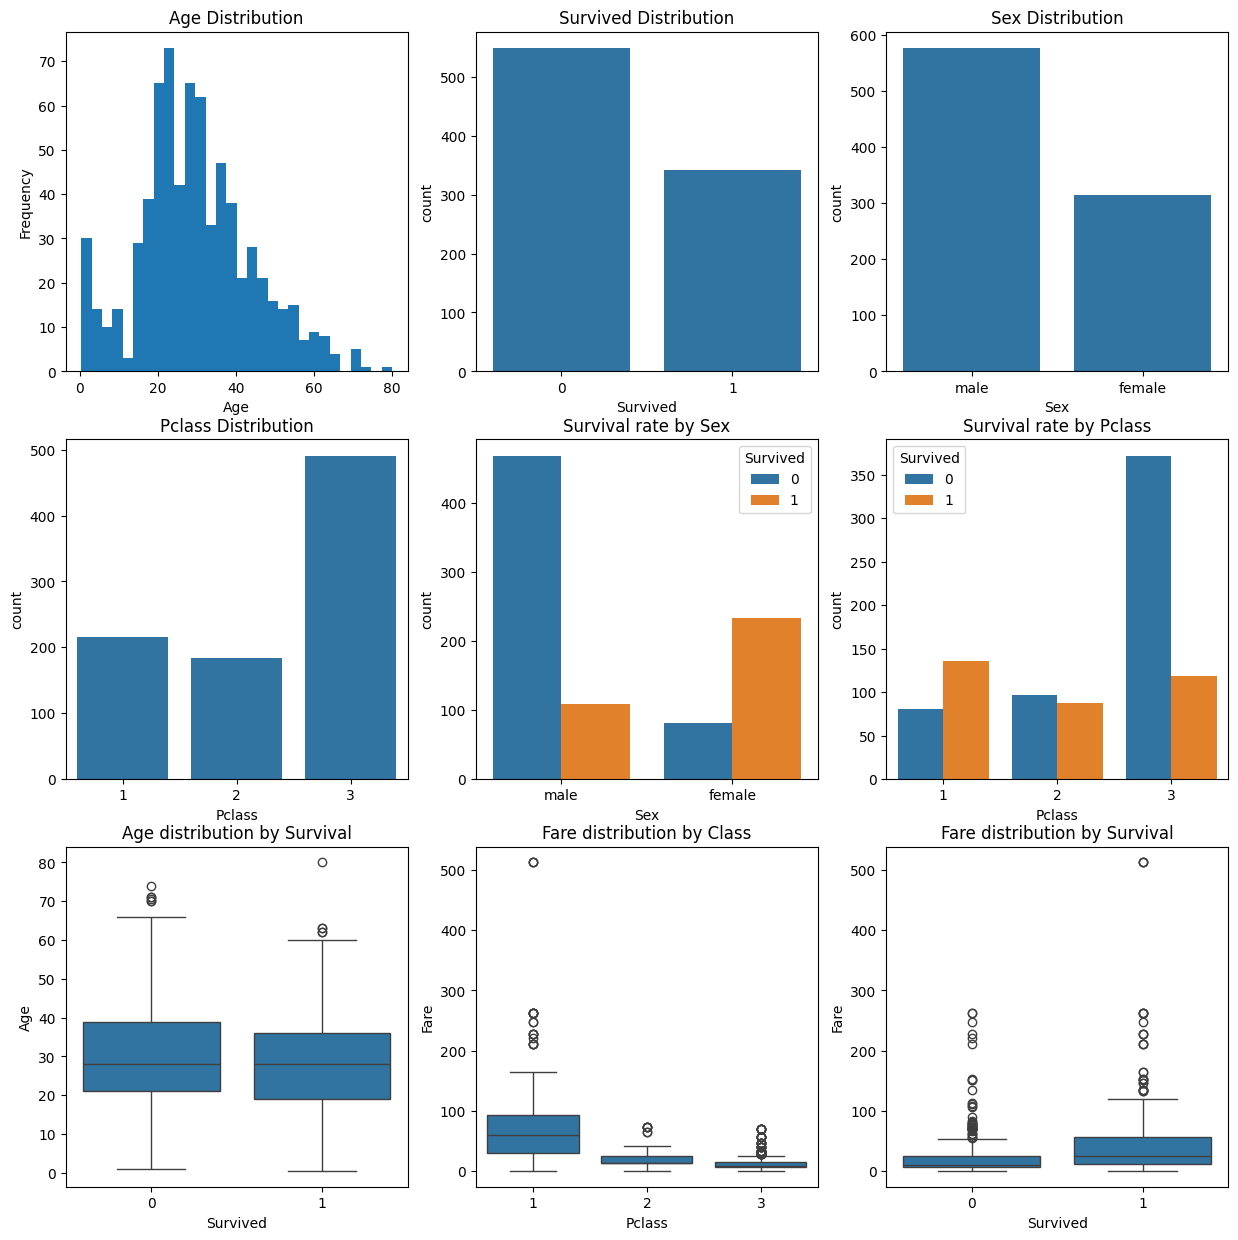

In [29]:
# Age Distribution Histogram Plot
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()
axs[0].hist(df['Age'], bins=30)
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')
# Count plot for Survived field
sns.countplot(x='Survived', data=df, ax=axs[1])
axs[1].set_title('Survived Distribution')
# Count plot for Sex
sns.countplot(x='Sex', data=df, ax=axs[2])
axs[2].set_title('Sex Distribution')
# Count plot for Pclass
sns.countplot(x='Pclass', data=df, ax=axs[3])
axs[3].set_title('Pclass Distribution')
# Survival rate by Sex
sns.countplot(x='Sex', hue='Survived', data=df, ax=axs[4])
axs[4].set_title('Survival rate by Sex')
# Survival rate by Class
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axs[5])
axs[5].set_title('Survival rate by Pclass')
# Age distribution by Survival
sns.boxplot(x='Survived', y='Age', data=df, ax=axs[6])
axs[6].set_title('Age distribution by Survival')
# Fare distribution by Class
sns.boxplot(x='Pclass', y='Fare', data=df, ax=axs[7])
axs[7].set_title('Fare distribution by Class')
# Age distribution by Fare
sns.boxplot(x='Survived', y='Fare', data=df, ax=axs[8])
axs[8].set_title('Fare distribution by Survival')
plt.show()


![plots](https://i.imgur.com/N7ablKH.png)

The plots should look something like this. The first four are basic histograms to show the distributions of age, survival, sex and ticket class aboard the Titanic. Looking at those, we can see that
*   most of the people on the Titanic were in the 20-40 age range,
*   comparatively few passangers survived,
*   approximately 2/3 of the people were male and
*   passangers having the worst class ticket make up for more than half the population aboard the Titanic. <br><br>

After those, we have two count plots for survival rates by sex and ticket class.
When we examine these we can come to a conclusion that even though males were in larger quantity than females, they make up for ~1/3 the survivor count. And unsurprisingly, the rate of survival decreases SIGNIFICANTLY going from higher class to lower class tickets. <br><br>
And lastly we have the box plots to show the age and fare distribution by survival and fare distribution by class. Why box plots? Because they provide a quick summary to the data and histograms would not be suitable here for two variables one of which is categorical and one of which is numerical.
Returning back to the explanation of the plots, here we can see that the age demographic of both survivors and non-survivors are similar, though survivors seem to be marginally on the younger side. Obviously the fare distribution seems as expected. Meaning a passanger with a higher class ticket has paid relatively more and again, unsurprisingly, people who survived seem to have a considerably greater fare distribution. <br><br>
Remember that the Cabin information was mostly empty in the dataset. And it can take a lot of different values as there were a lot of cabins in the Titanic. Instead of plotting it directly, let's try to compare the survival rates of people with cabin information filled to the ones that are empty.

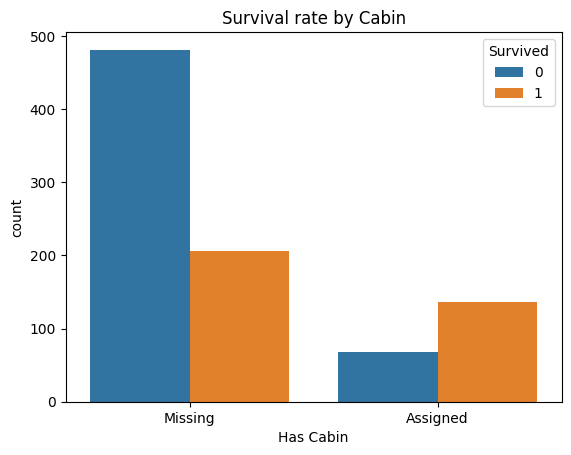

In [38]:
# Create a new column for the cabin missing information
df['Has Cabin'] = df['Cabin'].notna().map({True: 'Assigned', False: 'Missing'})
sns.countplot(x='Has Cabin', hue='Survived', data=df).set_title("Survival rate by Cabin")
plt.show()


![cabin plot](https://i.imgur.com/HWffMBi.png)

Wow. Turns out most of the people who did not survive are the people with missing cabin information. There is still information that we didn't process though and some of it might be important. Let's look at the Sibsp and Parch fields and create a new feature with them resembling a family size aboard the Titanic and visualise survival rate by family size as well!

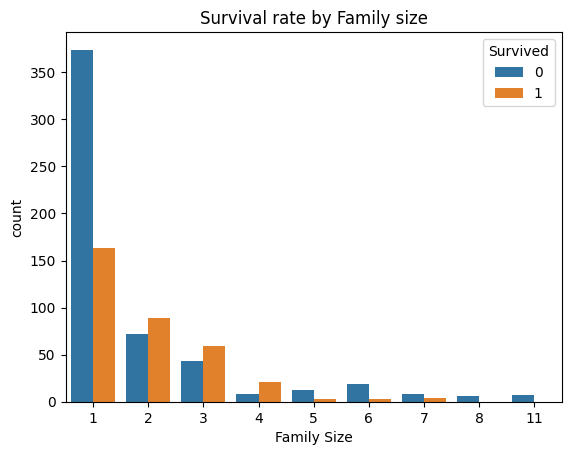

In [39]:
# Create a new feature for the family size aboard the Titanic using Sibsp and Parch fields. Adding 1 to it means they themselves are included in the family.
df['Family Size'] = df['SibSp'] + df['Parch'] + 1
sns.countplot(x='Family Size', hue='Survived', data=df).set_title('Survival rate by Family size')
plt.show()

![Family Size Plot](https://i.imgur.com/0c3Zqk5.png)

Seems like as the family size increases, survival rate actually increases up to a certain point (size of 4). Then decreases to almost none. I would have guessed that smaller families would survive easier as they wouldn't need to search for, protect and/or organize many people but turns out I was kind of wrong with my assumption. Though huge families still having very little survival rate still points towards that assumption being kind of right too.
<br><br>
# Key Findings
*   Females, passangers who had an assigned cabin, passangers who got better class tickets and people with middle sized families aboard the Titanic tend to have had a higher survival rate.
*   Even if a huge portion of the data in a column is missing, it can still be utilized by comparing missing to non-missing data.
*   Creating more meaningful features from existing features is very useful for plotting and observing relationships between featurues.
*   Using different types of plots (and libraries for them) is essential to visualise relationships between different combinations of types of data.

